# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Scatter-Plots" data-toc-modified-id="Scatter-Plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scatter Plots</a></div><div class="lev1 toc-item"><a href="#Barplot" data-toc-modified-id="Barplot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Barplot</a></div><div class="lev1 toc-item"><a href="#Histogram" data-toc-modified-id="Histogram-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Histogram</a></div><div class="lev1 toc-item"><a href="#Box-plot" data-toc-modified-id="Box-plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Box plot</a></div><div class="lev1 toc-item"><a href="#双y轴坐标轴图" data-toc-modified-id="双y轴坐标轴图-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>双y轴坐标轴图</a></div><div class="lev1 toc-item"><a href="#动态图" data-toc-modified-id="动态图-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>动态图</a></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 统计可视化
from ggplot import *
import matplotlib as mpl
import matplotlib.dates as mdate
import matplotlib.ticker as mtick

import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy

from images2gif import writeGif
from PIL import Image

from IPython.display import Image as Image2
from IPython.display import display

%matplotlib inline

In [2]:
mpl.rcParams["figure.figsize"] = "8, 4"

In [3]:
x = np.random.normal(0,1,10)
y = x + np.random.normal(0,1,10)
z = np.random.choice(range(1, 100), 10)
df = pd.DataFrame({'x' : x, 'y' : y, 'z' : z })
df['c'] = pd.Series(['a','b','c','d','e','f','g','h','i','j'])

In [4]:
x = np.random.normal(0,1,1000)
y = np.random.normal(0,1,1000)
z = np.random.choice(range(1, 100), 1000)
df2 = pd.DataFrame({'x' : x, 'y' : y, 'z' : z })

In [5]:
df.head()

,x,y,z,c
0,-0.139317,1.133943,45,a
1,-0.545621,-0.919265,4,b
2,1.064091,1.878572,99,c
3,-0.062451,0.387174,29,d
4,0.908977,1.386587,50,e


# Scatter Plots

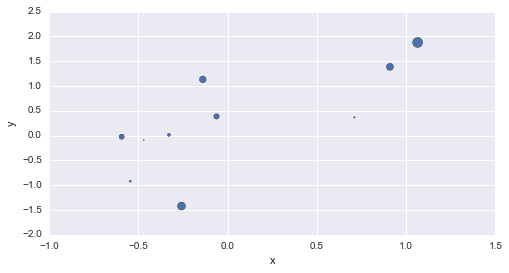

In [6]:
df.plot.scatter(x='x', y='y', s=df['z']);
# df.plot(kind= 'scatter', x='x', y='y', s=df['z']);

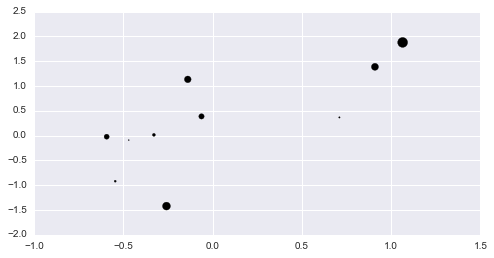

In [7]:
plt.scatter(df['x'], df['y'], s=df['z'], c='black');

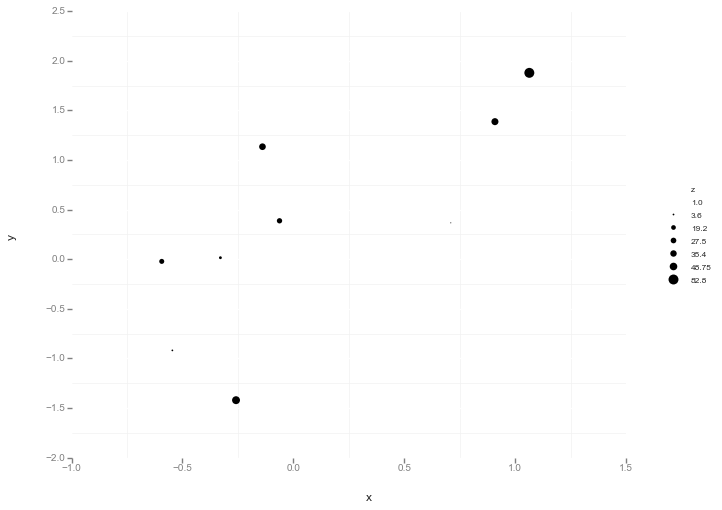

<ggplot: (293872777)>

In [8]:
ggplot(df, aes(x='x',y='y',size='z')) + geom_point() + theme_bw()

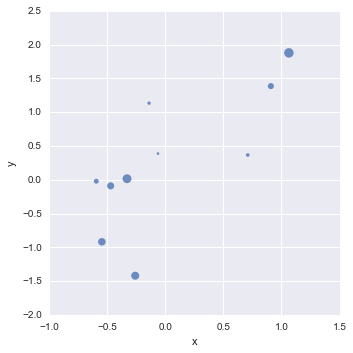

In [9]:
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": z}, size =5)

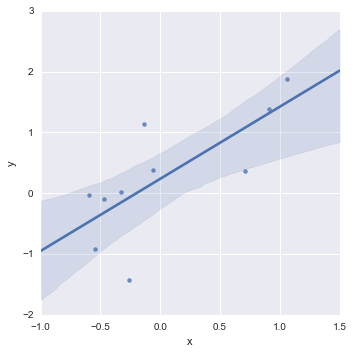

In [10]:
sns.lmplot('x', 'y', data=df, fit_reg=True, size =5);

# Barplot

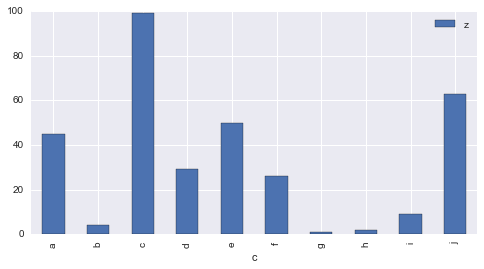

In [11]:
# df.plot.bar(x='c',y='z');
df.plot(kind='bar', x='c', y='z');

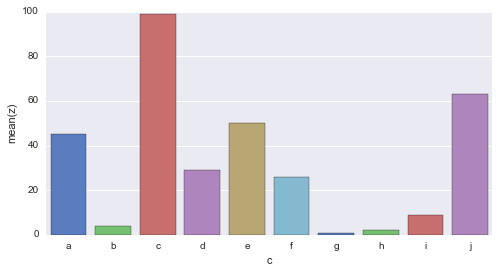

In [12]:
sns.set_style("darkgrid")
bar_plot = sns.barplot(x=df["c"],y=df["z"],
palette="muted",
order=df["c"].tolist())
# plt.xticks(rotation=90)
plt.show()

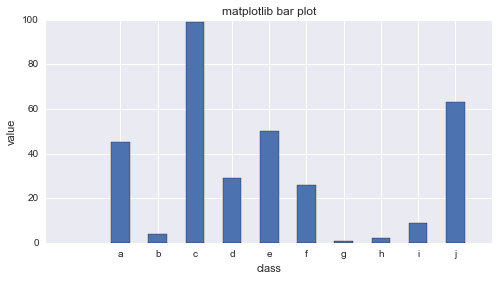

In [13]:
plt.bar(left = range(len(df)),height = df['z'], width = 0.5, align="center");
plt.xlabel('class')
plt.ylabel('value')
plt.title('matplotlib bar plot')
plt.xticks(range(len(df)),df['c']);

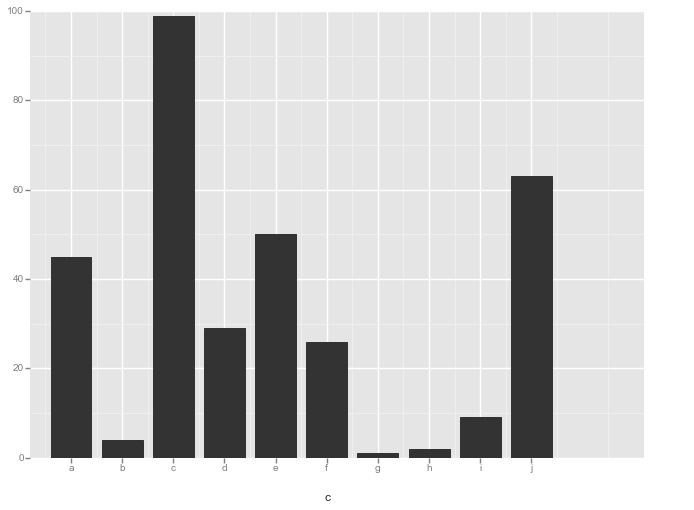

<ggplot: (297900277)>

In [14]:
ggplot(df, aes(x='c', weight='z')) + geom_bar()

# Histogram

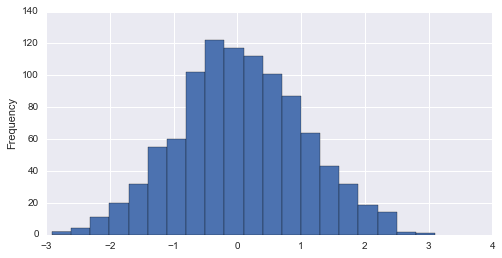

In [15]:
df2['x'].plot.hist(bins=20)

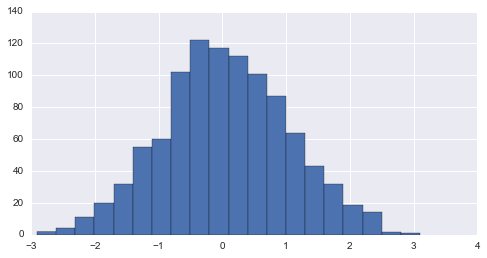

In [16]:
plt.hist(df2['x'], bins=20);

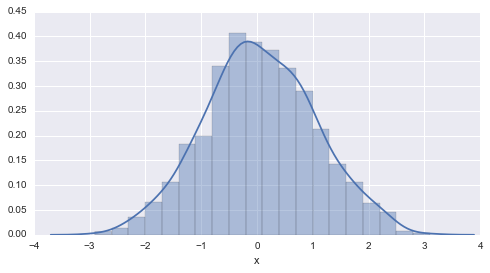

In [17]:
sns.distplot(df2['x'], bins=20);

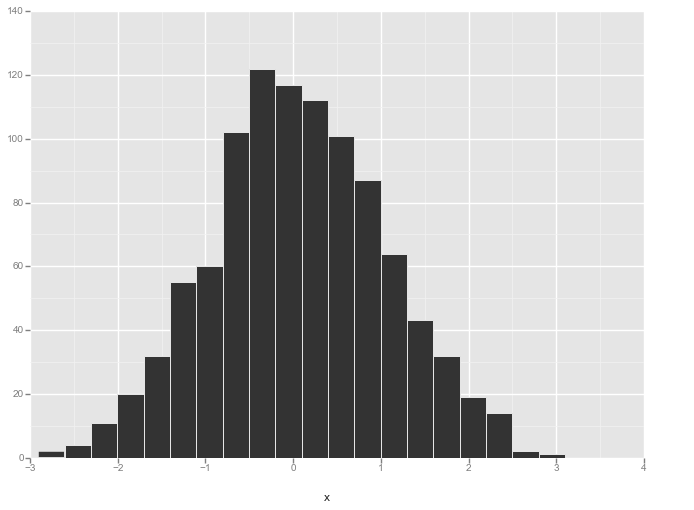

<ggplot: (299202765)>

In [18]:
ggplot(df2, aes(x='x')) + geom_histogram(bins=20)

# Box plot

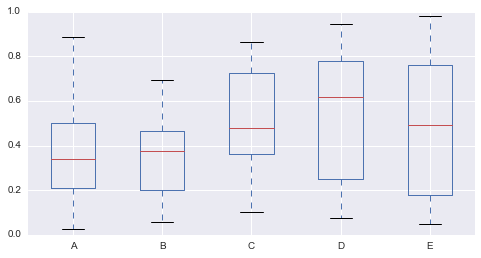

In [19]:
df3 = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df3.plot.box()

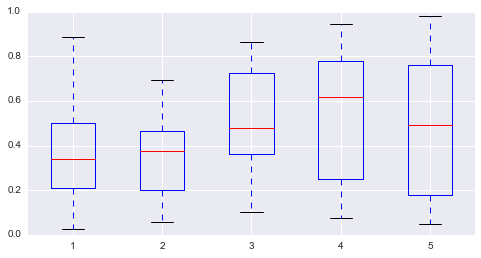

In [20]:
numpyMatrix = df3.as_matrix()
plt.boxplot(numpyMatrix);

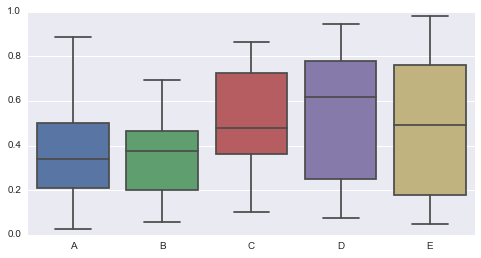

In [21]:
sns.boxplot(data=df3);

# 双y轴坐标轴图

In [22]:
x = np.random.normal(0,1,50)
y = 0.5 * x + 0.01 * np.random.normal(0,1,50)
z = -1.2 * x + 0.05 * np.random.normal(0,1,50)
df4 = pd.DataFrame({'x' : x, 'y' : y, 'z' : z })
df4 = df4.sort_values(['x'])

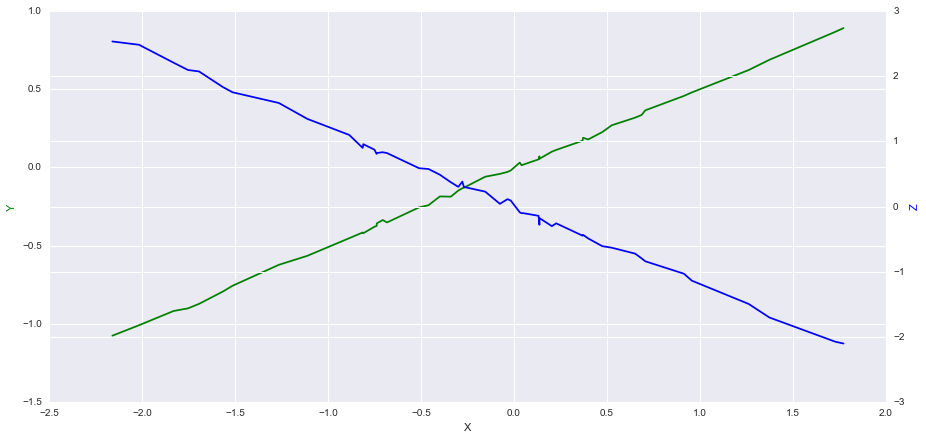

In [23]:
fig, ax1 = plt.subplots(figsize=(15, 7))
ax2 = ax1.twinx()

ax1.plot(df4['x'], df4['y'], 'g-')
ax2.plot(df4['x'], df4['z'], 'b-')

ax1.set_xlabel('X')
ax1.set_ylabel('Y', color='g')
ax2.set_ylabel('Z', color='b');


# 动态图

In [24]:
df = pd.read_csv("olympics.txt",sep='\t')
cc_df = pd.read_csv("country_codes.txt", sep='\t')
df = df.merge(cc_df, on=['NOC'], how='left').rename(columns = {'country':'Country'})
df = df[['Edition', 'City', 'Event','NOC','Country','Medal']]
df =  df.drop_duplicates()
df.head()

,Edition,City,Event,NOC,Country,Medal
0,1896,Athens,100m freestyle,HUN,Hungary,Gold
1,1896,Athens,100m freestyle,AUT,Austria,Silver
2,1896,Athens,100m freestyle for sailors,GRE,Greece,Bronze
3,1896,Athens,100m freestyle for sailors,GRE,Greece,Gold
4,1896,Athens,100m freestyle for sailors,GRE,Greece,Silver


In [25]:
df['Count'] = df.groupby(['Edition','NOC','Country','Event', 'Medal'])['Medal'].transform('count')
df = df[['Edition', 'City', 'NOC', 'Country','Count']].groupby(['Edition', 'City','NOC','Country']).count().reset_index()
df = df.sort_values(by=['Edition', 'Count'], ascending=[True, False])
df.head()

,Edition,City,NOC,Country,Count
6,1896,Athens,GRE,Greece,45
9,1896,Athens,USA,United States,19
5,1896,Athens,GER,Germany,13
3,1896,Athens,FRA,France,11
4,1896,Athens,GBR,United Kingdom,7


In [26]:
maps = []
for _, olympics in df.groupby('Edition'):
    # set the figure size
    plt.figure(figsize=(12,16))
    # slice the top 10 medal winners from the group
    olympics = olympics.head(10)
    # create our globe projection, adding our boundaries and country borders along the way
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND)
    ax.set_extent([-145, 41, -5, 35])
    shpfilename = shpreader.natural_earth(resolution='110m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    # loop through each country, and add some orange color if we find it in our Top 10 from that year. If we don't find it, we'll turn it blue instead.
    countries = reader.records()
    for country in countries:
        # print country.attributes['adm0_a3']
        if any(olympics.NOC == country.attributes['adm0_a3']) or any(olympics.Country == country.attributes['geounit']):
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor=(0.93, 0.325, 0.0666),label=country.attributes['adm0_a3'])
        else:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor=(0.21, 0.58, 0.84),label=country.attributes['adm0_a3'])
    #add the Olympics Edition as our title
    year =  str(olympics['Edition'].iloc[0])
    plt.title(year,  fontsize=25)
    # add a blank row to keep consistent table size (1904 had only 9 competing countries)
    if year == "1904":
        olympics.loc[len(olympics)] = ['1904', 'St Louis', '', '', '']
    # add our table, format it, and place it on the bottom of the map
    table_vals= olympics[['Country','Count']].head(10).values
    col_labels=['Country','Medal Count']
    the_table = plt.table(cellText=table_vals,colWidths = [0.5, 0.5],colLabels=col_labels,cellLoc='center',loc='bottom',)
    the_table.set_fontsize(14)
    the_table.scale(1, 5)
    # save each figure as a png and add it to an array (we'll come back to this later)
    pic_file = "medal_count_" + year + ".png"
    maps.append(pic_file)
    plt.savefig(pic_file, bbox_inches='tight')
    plt.close()

/Users/alicefelix/anaconda/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)
/Users/alicefelix/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


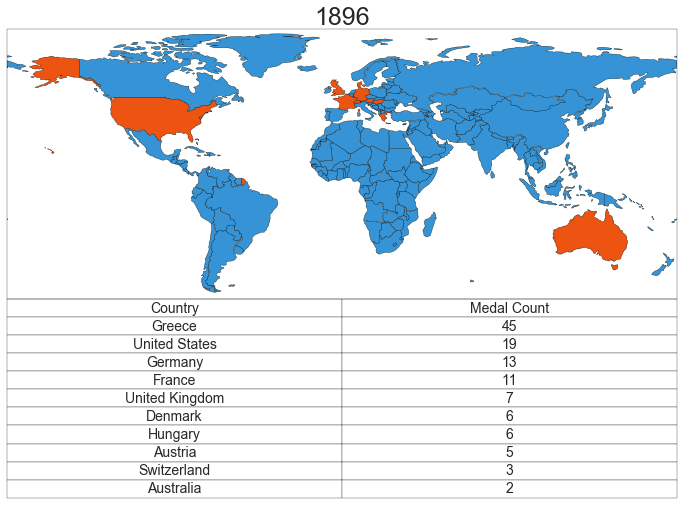

In [27]:
with open('olympics_globe.gif','rb') as f:
    display(Image2(f.read()), format='png')